# **2. Descripción del modelo**

En el artículo principal se estudia la dinámica del **sloshing** mediante un péndulo plano con excitación paramétrica (en el artículo en cuestión, así como en el artículo original, se menciona que este y otros modelos similares son ampliamente utilizados para estudiar el fenómento del sloshing en general).

<br><center>

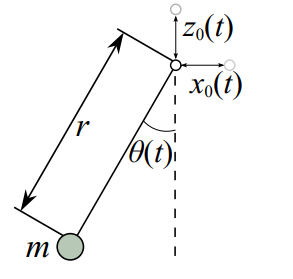

</center>

<br>En el artículo principal se menciona que el sistema conformado por la taza de café se puede considerar como un péndulo con longitud variable y un pivote en movimiento. A continuación describimos los parámetros de dicho sistema, relacionando cada uno con su análogo en el sistema original:

<br>-- **Longitud original de la varilla ($r_0$):** En la taza de café, $r_0$ es la altura del café contenido en la taza.

<br>-- **Longitud de la varilla ($r$):** En la taza de café, $r(t)$ es la altura del café contenido en la taza que efectivamente está oscilando en el instante $t$.

<br>-- **Masa del "bob"($m$):** En la taza de café, $m$ es la masa del café contenido en la taza.  

<br>-- **Aceleración de la gravedad ($g$ ).**

<br>-- **Posición del pivote $(x_0(t),z_0(t))$:** $x_0$ describe la posición horizontal del pivote, mientras que $z_0$ describe la posición vertical del mismo. En la taza de café, ubicamos al pivote a la altura de la superficie del café.  

<br>En el artículo realmente no se establecen estas analogías explícitamente (una vez se menciona el sistema equivalente, todo se hace en términos de éste). Nosotros tratamos de relacionar ambos sistemas para tener claro en todo momento lo que se está haciendo.

<br>El artículo también menciona los términos **excitación directa** y **excitación paramétrica**. Hablamos de **excitación directa** cuando es provocada por fuerzas externas. En cambio, hablamos de **excitación paramétrica** cuando es provocada por la modificación de un parámetro del sistema. En el sistema conformado por la taza de café, por ejemplo, el movimiento vertical $z_0$ actúa como una excitación paramétrica, ya que cambia la posición del pivote, lo que altera las condiciones de oscilación.

<br>Ya tenemos todos los elementos necesarios para entender los aspectos físicos del modelo. Ahora vamos con los aspectos matemáticos. Para obtener la ecuación de movimiento, usamos el enfoque de la mecánica lagrangiana:

<br>--**Energía cinética ( $T$ ):**

$$T=\frac{m}{2} [(\dot{x}-\dot{x_0})^2+(\dot{z}+\dot{z_0})^2] $$

donde:

<br>-- $x=r(t) \, sen(\theta)$.

<br>-- $z=-r(t) \, cos(\theta)$.

<br>--**Energía potencial ($V$):**

$$V=mg[z+z_0]$$

<br>A continuación, aplicamos la ecuación de Euler-Lagrange para obtener la ecuación de movimiento:

$$\frac{d}{dt} \left(\frac{\partial L}{\partial \dot{\theta}}\right)-\frac{\partial L}{\partial \theta}=0$$

<br>donde $L=T-V$. Después de llevar a cabo las operaciones indicadas y de simplificar, obtenemos la ecuación del péndulo con excitación paramétrica:

<br>$$r^2 \ddot{\theta}+r[g+\ddot{z}_0]sen(\theta)+r\ddot{x}_0cos(\theta)+2r\dot{r}\dot{\theta}=0 \tag{1}$$

<br>Esta ecuación describe la dinámica del sistema en términos generales. Ahora, sabemos que:

<br>-- $sen(\theta) \approx \theta-\frac{\theta^3}{6}$.

<br>-- $cos(\theta) \approx 1-\frac{\theta^2}{2}$.

<br>siempre que $\theta \approx 0$ (lo anterior se deduce a partir de las series de Taylor de las funciones trigonométricas). Al llevar a cabo las aproximaciones indicadas, la ecuación (1) se convierte en:

<br>$$r^2 \ddot{\theta}+r[g+\ddot{z}_0]\left[\theta-\frac{\theta^3}{6} \right]-r\ddot{x}_0\frac{\theta^2}{2}+2r\dot{r}\dot{\theta}=-r\ddot{x}_0 \tag{2}$$

<br>Investigando un poco encontramos que las aproximaciones en cuestión se utilizan porque, por un lado, simplifican el modelo reflejando aún la no linealidad del sistema (en otras palabras: simplifican, pero no demasiado); por otro lado, los términos de orden superior son muy pequeños en comparación a los términos utilizados (suponiendo que $\theta \approx 0$).

<br>

# **3. Solución de la ecuación de movimiento**

De acuerdo con el autor del artículo principal, si consideramos únicamente el movimiento vertical del pivote, la ecuación de movimiento pasa a ser (después de normalizar):

<br>$$u''+[1+\epsilon \, \lambda \, Ω^2 cos( \, \Omega \, \tau)]\left(u-\frac{\epsilon^2 \, u^3}{6}\right)=0 \tag{3}$$

donde:

<br>-- $\tau=\omega \, t$.

<br>-- $\omega_{0}^2=\frac{g}{r_0}$.

<br>-- $\epsilon \, \lambda=-\frac{\Delta z}{r_0}$.

<br> -- $\Omega=\frac{\omega}{\omega_0}$.

<br>$\lambda$ es la razón entra la longitud efectiva y amplitud de oscilación, y $\epsilon$ es un parámetro de orden. Leyendo un poco al respecto, encontramos que la normalización es útil, entre otras cosas, para mejorar la precisión computacional de los cálculos.

<br>Consideremos las condiciones iniciales $u(a)=\alpha_1$ y $u'(a)=\alpha_2$. Adicionalmente, consideremos $u_1(\tau)=u(\tau)$ y $u_2(\tau)=u'(\tau)$. Así pues, la ecuación (3), junto con las condiciones iniciales mencionadas, se puede expresar como un sistema de problemas de valor inicial de primer orden:

<br>$$u_1'=u_2$$

$$u_2'=-[1+\epsilon \, \lambda \, Ω^2 cos( \, \Omega \, \tau)]\left(u_1-\frac{\epsilon^2 \, u_1^3}{6}\right)$$

<br>con condiciones iniciales $u_1(a)=u(a)=\alpha_1$ y $u_2(a)=u'(a)=\alpha_2$.



# 4. Solucion numérica con scipy

Utilizaremos la siguiente parametrizacion:

<br>$ε = 0.2$
<br>$λ = 0.1$
<br>$Ω=0.5$
<br>$u_1(a)=u(a)=0.5$
<br>$u_2(a)=u'(a)=0$.

<br>Y vamos a evaluar valores de τ entre 0 y 100

In [ ]:
#importar librerias
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# funcion que evalua el sistema de ecuaciones con los siguientes parametros: ε = 0.2, λ = 0.1, Ω=0.5 (Parametros similares a los de la figura 4b del articulo)
# y parametros: ε = 0.1, λ = 1.0, Ω=2.0
import math
set1 = {"LAMBDA":0.1,
        "EPSILON":0.2,
        "OMEGA":0.5}

set2 = {"LAMBDA":0.1,
        "EPSILON":1.0,
        "OMEGA":2.0}


def F(τ, u, EPSILON, LAMBDA, OMEGA):
  u1, u2 = u
  du1dt = u2
  du2dt = - (1 + EPSILON * LAMBDA * OMEGA**2 * math.cos(OMEGA * τ)) * (u1 - EPSILON**2 * u1**3 / 6)
  return [du1dt, du2dt]



#Condiciones iniciales
u0 = [0.5, 0.0]
τ_span = [0, 100]
τ_eval = np.linspace(0, 100, 1001)

#Resolver sistema
sol1 = scipy.integrate.solve_ivp(F, τ_span, u0, args=(set1["EPSILON"], set1["LAMBDA"], set1["OMEGA"]),method='RK45',t_eval=τ_eval)
sol2 = scipy.integrate.solve_ivp(F, τ_span, u0, args=(set2["EPSILON"], set2["LAMBDA"], set2["OMEGA"]),method='RK45',t_eval=τ_eval)

# 5. Graficos

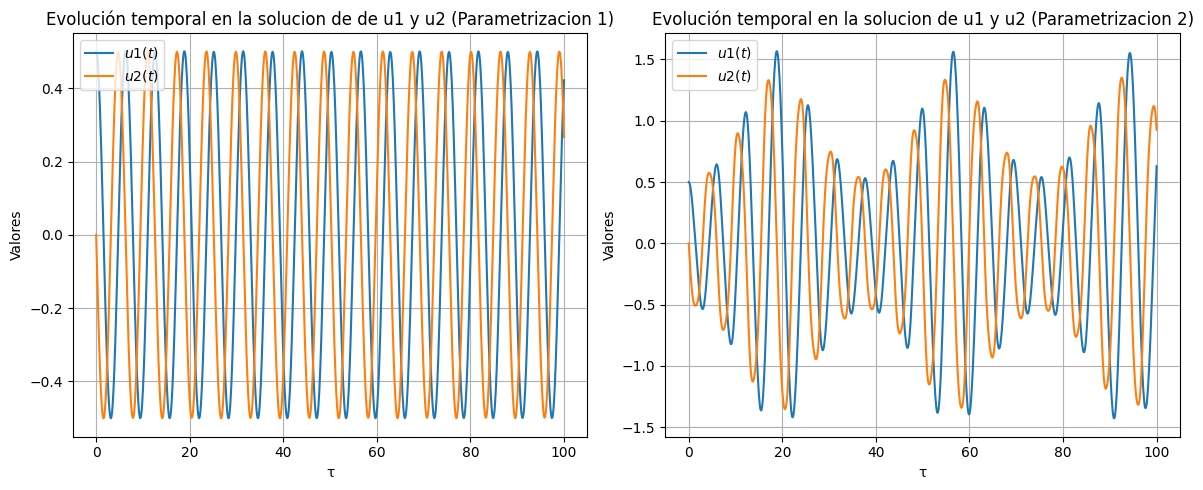

In [ ]:
#Graficar Resultados
plt.figure(figsize=(12, 5))

#Evolución temporal de u1 y u2 para la solucion 1
plt.subplot(1, 2, 1)
plt.plot(sol1.t, sol1.y[0], label='$u1(t)$')
plt.plot(sol1.t, sol1.y[1], label='$u2(t)$')
plt.xlabel('τ')
plt.ylabel('Valores')
plt.grid(True)
plt.title('Evolución temporal en la solucion de de u1 y u2 (Parametrizacion 1)')
plt.legend(loc='upper left')

#Evolución temporal de u1 y u2 para la solucion 2
plt.subplot(1, 2, 2)
plt.plot(sol2.t, sol2.y[0], label='$u1(t)$')
plt.plot(sol2.t, sol2.y[1], label='$u2(t)$')
plt.xlabel('τ')
plt.ylabel('Valores')
plt.grid(True)
plt.title('Evolución temporal en la solucion de u1 y u2 (Parametrizacion 2)')
plt.legend(loc='upper left')
plt.tight_layout()  # Ajusta automáticamente los subgráficos para que tengan un padding adecuado y no se solapen
plt.show()


In [ ]:
# Crear un DataFrame con los valores de cada set
data = {
    "Parámetro": ["No linealidad", "Excitación", "Frecuencia", "Comportamiento"],
    "set1 (ϵ=0.2)": ["Débil (ϵ^2=0.04)", "Débil (ϵλΩ^2=0.005)", "Baja (Ω=0.5)", "Oscilaciones regulares"],
    "set2 (ϵ=1.0)": ["Fuerte (ϵ^2=1.0)", "Fuerte (ϵλΩ^2=0.4)", "Alta (Ω=2.0)", "Oscilaciones irregulares o caóticas"]
}

# Convertir el diccionario a DataFrame
tabla = pd.DataFrame(data)

tabla


,Parámetro,set1 (ϵ=0.2),set2 (ϵ=1.0)
0,No linealidad,Débil (ϵ^2=0.04),Fuerte (ϵ^2=1.0)
1,Excitación,Débil (ϵλΩ^2=0.005),Fuerte (ϵλΩ^2=0.4)
2,Frecuencia,Baja (Ω=0.5),Alta (Ω=2.0)
3,Comportamiento,Oscilaciones regulares,Oscilaciones irregulares o caóticas


## Comportamiento esperado para el set1:

- **Oscilaciones regulares**: El sistema se comporta casi como un oscilador lineal, con oscilaciones suaves y predecibles.

- **Amplitud constante**: La excitación paramétrica es demasiado débil para inducir resonancias o crecimiento de amplitud.

**Para el diagrama de fase del set 1:** El sistema se comporta como un oscilador armónico ligeramente perturbado, lo que resulta en una trayectoria cerrada que se traduce en elipses o círculos (oscilaciones periódicas).

## Comportamiento esperado para el set2:

- **Oscilaciones no lineales:** El término cúbico \( u_1^3 \) introduce distorsiones en las oscilaciones.

- **Resonancias paramétricas:** La excitación paramétrica puede inducir crecimiento de amplitud o comportamientos caóticos.


**Para el diagrama de fase del set 2:** El término \( u_1^3 \) distorsiona las trayectorias, resultando en trayectorias complejas con comportamientos caóticos.


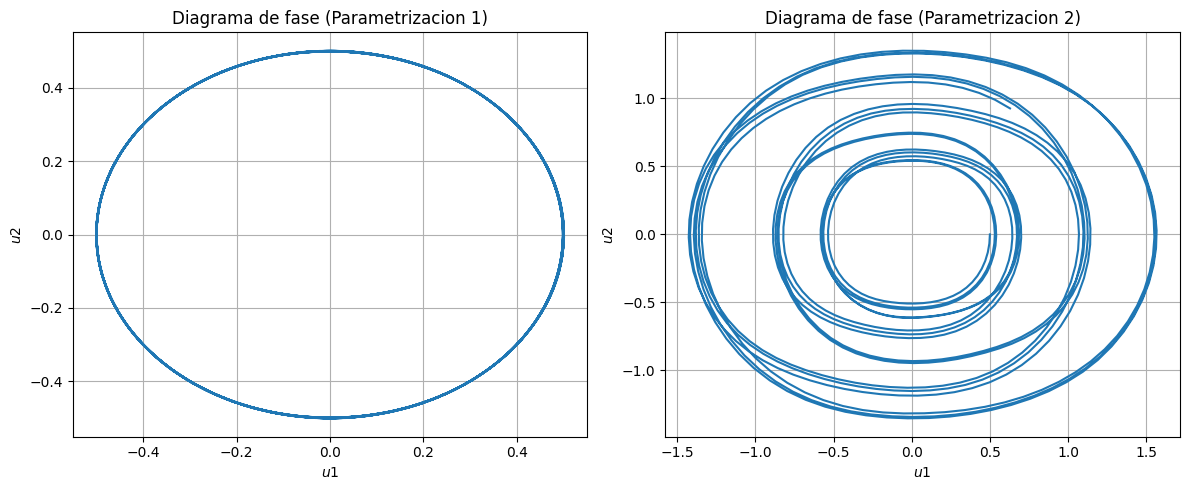

In [ ]:
#Diagrama de fase (u2 vs u1) para la solución 1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(sol1.y[0], sol1.y[1], label='Solucion 1')
plt.xlabel('$u1$')
plt.ylabel('$u2$')
plt.title('Diagrama de fase (Parametrizacion 1)')
plt.tight_layout()
plt.grid(True)

#Diagrama de fase (u2 vs u1) para la solución 2
plt.subplot(1, 2, 2)
plt.plot(sol2.y[0], sol2.y[1], label='Solucion 2')
plt.xlabel('$u1$')
plt.ylabel('$u2$')
plt.title('Diagrama de fase (Parametrizacion 2)')
plt.grid(True)
plt.tight_layout()
plt.show()

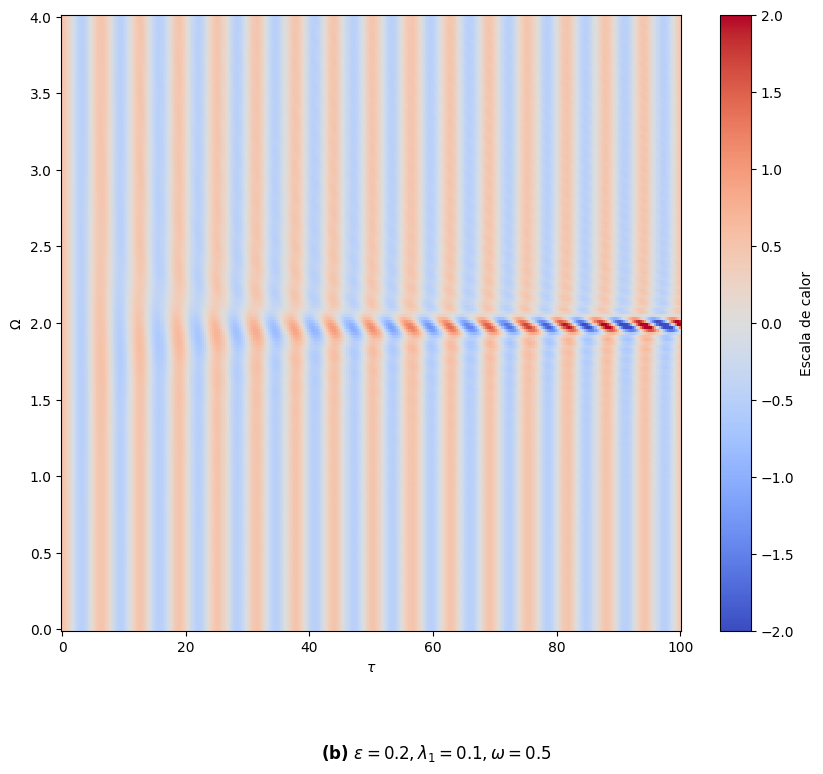

In [122]:
#Mapa de calor primer conjunto de parametros
# Definir la malla de valores
tau = np.linspace(0, 100, 300)  # Eje horizontal
omega = np.linspace(0, 4, 200)  # Eje vertical
Tau, Omega = np.meshgrid(tau, omega)

# Función para resolver la EDO para cada valor de Omega
def solve_differential(tau_values, omega_value):
    u0 = [0.5, 0.0]
    # Asegurarse de que omega_value se pase correctamente como argumento a la función F
    sol = scipy.integrate.solve_ivp(F, [tau_values[0], tau_values[-1]], u0, args=(set1["EPSILON"], set1["LAMBDA"], omega_value), t_eval=tau_values, method='RK45')
    return sol.y[0]  # Devuelve la solución u1

# Resolver la EDO para cada Omega y almacenar los resultados
Z = np.array([solve_differential(tau, w) for w in omega])

# Crear la figura y el mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
cmap = ax.pcolormesh(Tau, Omega, Z, shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
cbar = plt.colorbar(cmap, ax=ax)
cbar.set_label("Escala de calor")

# Etiquetas y título
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\Omega$')
params_text = r'$\varepsilon = {}, \lambda_1 = {}, \omega = {}$'.format(set1['EPSILON'], set1['LAMBDA'], set1['OMEGA'])
plt.figtext(0.5, -0.05, f"(b) {params_text}", ha="center", fontsize=12, fontweight="bold")

plt.show()


## Interpretación

El mapa de calor generado muestra cómo cambian las amplitudes de las oscilaciones en un sistema no lineal bajo la influencia de diferentes frecuencias de excitación (`Omega`) y a lo largo del tiempo (`tau`). Aquí está por qué el mapa se comporta de esta manera:

- **Variación en `Omega`**: Cada fila del mapa de calor representa una frecuencia de excitación diferente. Al aumentar `Omega`, la respuesta del sistema cambia debido a cómo las frecuencias específicas interactúan con las características dinámicas del sistema. Esto puede resultar en resonancias o en un comportamiento más caótico, donde ciertas frecuencias pueden amplificar o atenuar las amplitudes de las oscilaciones.

- **Evolución sobre `tau`**: El eje horizontal muestra cómo evoluciona la solución de la ecuación diferencial a lo largo del tiempo. Los patrones que observamos (por ejemplo, transiciones de áreas claras a oscuras) indican cómo las oscilaciones del sistema crecen, disminuyen o cambian su forma debido a la interacción entre la no linealidad del sistema y la excitación periódica.

- **Influencia de los términos no lineales**: El término cúbico (`Lambda * u1^3`) en las ecuaciones introduce distorsiones significativas en las oscilaciones, especialmente visible cuando `Omega` se ajusta a valores que resuenan con la dinámica del sistema. Esto puede explicar por qué vemos regiones de alta amplitud seguidas de regiones estables o caóticas en el mapa.

- **Coloración**: Los colores en el mapa de calor representan la magnitud de la amplitud de las oscilaciones, con colores más cálidos indicando amplitudes más altas y colores más fríos indicando amplitudes más bajas. Esto proporciona una visualización inmediata de cómo las amplitudes varían con `Omega` y `tau`.






In [ ]:
# funcion que evalua el sistema de ecuaciones con los siguientes parametros: ε = 0.2, λ = 0.1, Ω=0.5 (Parametros similares a los de la figura 4b del articulo)
import math
def F(t, u1, u2):
  LAMBDA = 0.1
  EPSILON = 0.2
  OMEGA = 0.5
  return (u2,-(1+EPSILON*LAMBDA*OMEGA**2*math.cos(OMEGA*t))*(u1-(EPSILON**2*u1**3)/6))

# 6. Solucion con metodo de Runge-Kutta de orden 4


In [ ]:
def rungeKutta4(w0, v0, a, b, n: int, f = F):
    """
    Aproxima la solución de la EDO: w' = F(t, W)

    Parámetros:
      - f: función que define la EDO, F(t, W). Esta funcion debe retornar una tupla con los valores de evaluar en el primer y segundo sistema de ecuaciones (w,v)
      - w0: primera condicion inicial
      - v0: segunda condicion inicial
      - a: tiempo inicial
      - b: tiempo final
      - n: número de pasos

    Retorna:
      - lista de aproximaciones para w en cada paso.
    """
    h = (b - a) / n
    t = [a]  # Lista con los tiempos t_i
    w = [w0]  # Lista con las aproximaciones w_i
    v = [v0]  # Lista con las aproximaciones v_i

    for i in range(0, n):
        t_i = a + h * i

        # Calculo de los k_i para la primera y segunda ecuacion del sistema de ecuaciones:
        kw_1 = h * f(t_i, w[i], v[i])[0]
        kv_1 = h * f(t_i, w[i], v[i])[1]
        kw_2 = h * f(t_i + h / 2, w[i] + kw_1 / 2, v[i] + kv_1 / 2)[0]
        kv_2 = h * f(t_i + h / 2, w[i] + kw_1 / 2, v[i] + kv_1 / 2)[1]
        kw_3 = h * f(t_i + h / 2, w[i] + kw_2 / 2, v[i] + kv_2 / 2)[0]
        kv_3 = h * f(t_i + h / 2, w[i] + kw_2 / 2, v[i] + kv_2 / 2)[1]
        kv_4 = h * f(t_i + h, w[i] + kw_3, v[i] + kv_3)[1]
        kw_4 = h * f(t_i + h, w[i] + kw_3, v[i] + kv_3)[0]

        # Agregar w_(i+1) y v_(i+1) a la lista de aproximaciones:
        t.append(t_i + h)
        w.append(w[i] + (kw_1 + 2 * kw_2 + 2 * kw_3 + kw_4) / 6)
        v.append(v[i] + (kv_1 + 2 * kv_2 + 2 * kv_3 + kv_4) / 6)

    return t, w, v


## Grafico de solucion numerica con metodo de runge-kutta

In [ ]:
t, w, v = rungeKutta4(0.5, 0, 0, 100, 1000)
df = pd.DataFrame({'τ':t, 'u_1':w}).set_index('τ')
df

,u_1
τ,
0.0,0.500000
0.1,0.497494
0.2,0.490000
0.3,0.477594
0.4,0.460400
...,...
99.6,0.271890
99.7,0.312495
99.8,0.349964


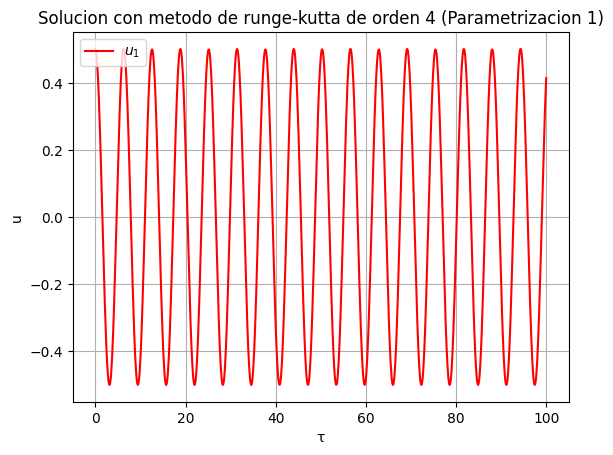

In [ ]:
plt.plot(df.index,df, label = '$u_1$', color = 'red') # Ingresar un dataframe df con los valores a graficar, en el indice del dataframe estan los t_i
plt.legend(loc='upper left') # para hacer que el label salga en la esquina superior izquierda
plt.subplot(1, 1, 1)
plt.title('Solucion con metodo de runge-kutta de orden 4 (Parametrizacion 1)')
plt.xlabel('τ')
plt.ylabel('u')
plt.grid(True)
plt.show()


# 7. Comparar resultados con solve_ivp y discutir discrepancias

## Grafico de comparacion entre los resultados de solve_ivp y nuestra solución numérica con el metodo de runge-kutta:

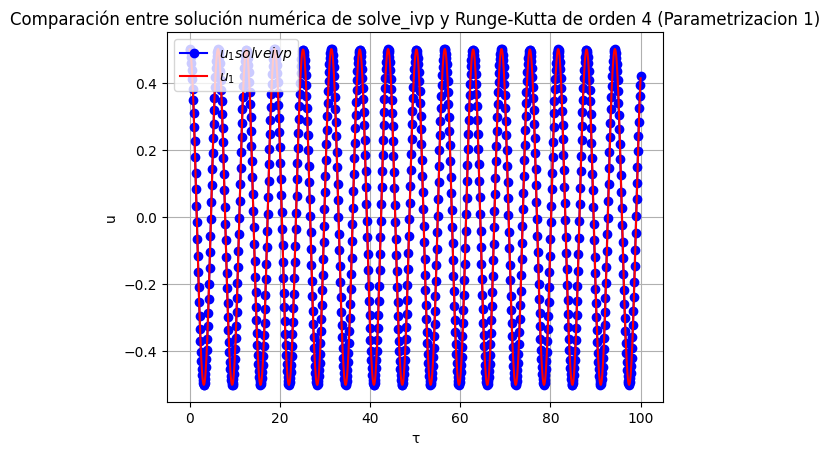

In [ ]:
#faltaria colocar aqui el grafico del punto 4

plt.plot(sol1.t, sol1.y[0], label='$u_1solveivp$', linestyle='-', marker = 'o', color = 'blue')
plt.plot(df.index,df, label = '$u_1$', color = 'red') # Ingresar un dataframe df con los valores a graficar, en el indice del dataframe estan los t_i
plt.legend(loc='upper left') # para hacer que el label salga en la esquina superior izquierda
plt.subplot(1, 1, 1)
plt.title('Comparación entre solución numérica de solve_ivp y Runge-Kutta de orden 4 (Parametrizacion 1)')
plt.xlabel('τ')
plt.ylabel('u')
plt.grid(True)
plt.show()
